# Lecture 27 Evaluation
__MATH 3080__ - Dr. Michael Olson

Reading:
* Geron, Chapter 3, pp. 89-97

Machine Learning Process
1. Obtain and Clean Data
2. Wrangle data
3. Exploratory Data Analysis
4. Model
5. __Evaluate__

Ultimately, either your model worked or it didn't. We can break this evaluation into multiple key metrics:
* Accuracy - Fraction of correct predictions
  $$ accuracy = \frac{\#~correct}{\#~of~predictions}$$
  * Good choice for balanced classes (equal numbers of different options)
  * Not a good choice for unbalanced classes
    * Predict 100 pictures to be dogs - If 99 are dogs, that's 99% accuracy!
* Recall
  * Ability of a model to find all relevant cases
$$recall = \frac{\#~true~positives}{\#~true~positives + \#~false~negatives}$$
* Precision
  * Ability to identify only the relevant cases
$$precision = \frac{\#~true~positives}{\#~true~positives + \#~false~positives}$$
* F1-Score
  * Harmonic mean of precision and recall
$$F_1 = 2*\frac{precision\cdot recall}{precision + recall}$$

__Confusion Matrix__

| Total Population | Prediction Positive | Prediction Negative |
| ---: | :---: | :---: |
| Condition Positive | True Positive (TP) | False Negative (FN)<br>(Type II error) |
| Condition Negative | False Positive (FP)<br>(Type I error) | True Negative (TN) |

Prevalence, True Positive Rate (TPR), False Positive Rate (FPR), etc.
* https://en.wikipedia.org/wiki/Confusion_matrix

The method used depends on the situation.
* Situation determines if we fix the false positives or the false negatives

Go back to the results of the last lecture and calculate the evaluation metrics for the test set.

Predicted,setosa,versicolor,virginica
Actual,,,
setosa,9.0,NaN,NaN
versicolor,NaN,11.0,1.0
virginica,NaN,NaN,9.0


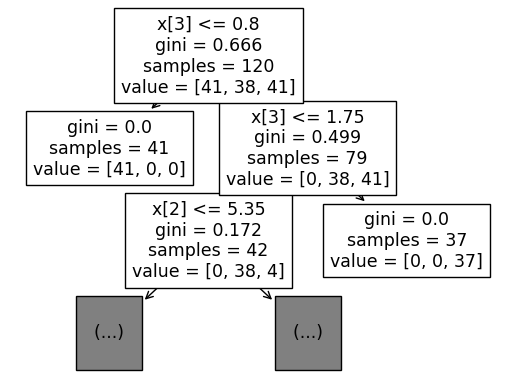

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.head()

# Create an array of randomized indices
random_index = np.random.permutation(len(iris))

# How many observations would 80% of the data be?
num_80 = int(0.8*len(iris))

# Training and Testing data
train = iris.loc[ random_index[:num_80] ]
X_train = train.drop('species', axis=1).values
y_train = train['species']

test = iris.loc[ random_index[num_80:] ]
X_test =  test.drop('species', axis=1).values
y_test = test['species']

# Build the model
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf, max_depth=2)

# Test the model
y_predict = clf.predict(X_test)

# Evaluate the model
test_results = pd.DataFrame(X_test, columns=iris.columns[:4])
test_results['Actual'] = np.array(y_test)
test_results['Predicted'] = y_predict
test_results['Correct'] = (np.array(y_test) == y_predict)

pd.pivot_table(test_results,
               index='Actual',
               columns='Predicted',
               values='Correct', # When doing a count, the column for 'values' doesn't matter
               aggfunc='count')

In [12]:
def accuracy(true, predicted):
    total_correct = (true == predicted).sum()
    return total_correct/len(true)

def precision(true, predicted, category):
    total_correct = ((true == predicted) & (predicted == category)).sum()
    total_predicted = (predicted == category).sum()
    return total_correct/total_predicted

def recall(true, predicted, category):
    total_correct = ((true == predicted) & (true == category)).sum()
    total_predicted = (true == category).sum()
    return total_correct/total_predicted

def f1score(true, predicted, category):
    p = precision(true, predicted, category)
    r = recall(true, predicted, category)
    return 2*p*r/(p+r)

In [13]:
accuracy(y_test, y_predict)

0.9666666666666667

In [21]:
print(f"Precision of     Setosa = {precision(y_test, y_predict, 'setosa')}")
print(f"Precision of Versicolor = {precision(y_test, y_predict, 'versicolor')}")
print(f"Precision of  Virginica = {precision(y_test, y_predict, 'virginica')}")

Precision of     Setosa = 1.0
Precision of Versicolor = 1.0
Precision of  Virginica = 0.9


In [22]:
print(f"Recall of     Setosa = {recall(y_test, y_predict, 'setosa')}")
print(f"Recall of Versicolor = {recall(y_test, y_predict, 'versicolor')}")
print(f"Recall of  Virginica = {recall(y_test, y_predict, 'virginica')}")

Recall of     Setosa = 1.0
Recall of Versicolor = 0.9166666666666666
Recall of  Virginica = 1.0


In [23]:
print(f"F1 Score of     Setosa = {f1score(y_test, y_predict, 'setosa')}")
print(f"F1 Score of Versicolor = {f1score(y_test, y_predict, 'versicolor')}")
print(f"F1 Score of  Virginica = {f1score(y_test, y_predict, 'virginica')}")

F1 Score of     Setosa = 1.0
F1 Score of Versicolor = 0.9565217391304348
F1 Score of  Virginica = 0.9473684210526316
